# R语言编程艺术

> 原书名: The Art of R Programming -- A Tour of Statistical Software Design
> 作者: Norman Matloff

## Chapter01

### 感受一下

#### 交互模式

在Linux/Mac系统中, 在终端输入`R`即可开始一个R会话, 如下:

```R
vin@vin-ubuntu:~$ R

R version 3.4.3 (2017-11-30) -- "Kite-Eating Tree"
Copyright (C) 2017 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> 

```

接着就可以执行R命令了.

考虑一个正态分布, 其均值为`0`, 方差为`1`.
如果随机变量`X`服从这个正太分布, 那么它的取值将以0为中心, 或正或负, 平均值为0. 现在要生成一个新的随机变量`Y=|X|`. 因为我们已经取了绝对值, Y的值将不会以0为中心, Y的均值也会大于0.

下面计算Y的均值, 基于模拟N(0, 1)分布随机变量的取值:

```R
> mean(abs(rnorm(100)))
[1] 0.7220695
```

这行代码生成100个随机变量, 计算它们的绝对值, 然后计算绝对值的均值. 

标签[1]表示这行的第一项是输出结果的第一项. 当输出多行时, 这样的标签可以帮助快速确定输出结果的行间分布.

除了交互式运行R命令, 还可以直接执行R脚本(`.R`或者`.r`后缀.)

```R
> source("z.R")
```

#### 批处理模式

这个和Python执行`.py`脚本是一样的, 只不过命令是`R CMD BATCH xxx.R`而已.

比如`test.R`的文件内容如下:

```R
pdf("hist.pdf") # 调用pdf函数, 指明将创建的图像保存在hist.pdf文件中
hist(rnorm(100)) # 生成100个服从N(0, 1)正态分布的随机变量
dev.off() # 关闭图形"设备", 即本例中的pdf文件
```

终端下执行该脚本:
```bash
$ R CMD BATCH test.R
```

这样就在当前目录下生成了相应的pdf文件.

#### 第一个R会话

用数字1, 2 ,4生成一个简单的数据集(R的说法是向量), 将其命名为`x`:

In [5]:
x <- c(1, 2, 4)

R的标准赋值运算符为`<-`. 也可以用`=`, 但是由于一些情况下`=`会失灵, 所以不建议使用. 同Python一样, x是动态类型, 可以将不同类型的值赋给它.

`c`意为`concatenate`, 表示`连接`. 
在这里, 我们吧数字1, 2, 4连接起来. 更准确地说, 是把三个一元向量连接起来, 因为每个数字都是一个一元向量.

接下来可以继续这么做:

In [6]:
q <- c(x, x, 8)
q

[1] 1 2 4 1 2 4 8

接着说明几种向量操作:

* 索引向量中单个元素

In [7]:
x[3]

[1] 4

运算符`[]`和Python/JS一致, 但是必须注意, **R的向量索引是从1开始, 而不是从0开始**.

* 提取子集(切片操作)

In [8]:
x <- c(1, 2, 4)
x[2:3]

[1] 2 4

除了索引开始的值不同, R的切片操作`[m:n]`是从m开始到n结束`而且包括n`, 这和Python不包括n是非常不同的.

* 求均值和标准差


In [9]:
mean(x)

[1] 2.333333

In [10]:
sd(x)

[1] 1.527525

#### 内置数据集

R语言自带了一些用于演示的数据集, 用`data()`函数调出数据集列表:

In [11]:
data()

```
Data sets
Package	Item	Title
datasets	AirPassengers	Monthly Airline Passenger Numbers 1949-1960
datasets	BJsales	Sales Data with Leading Indicator
datasets	BJsales.lead (BJsales)	Sales Data with Leading Indicator
datasets	BOD	Biochemical Oxygen Demand
datasets	CO2	Carbon Dioxide Uptake in Grass Plants
datasets	ChickWeight	Weight versus age of chicks on different diets
datasets	DNase	Elisa assay of DNase
datasets	EuStockMarkets	Daily Closing Prices of Major European Stock Indices, 1991-1998
datasets	Formaldehyde	Determination of Formaldehyde
...
datasets	Nile	Flow of the River Nile
...
```

其中有个数据集叫`Nile`, 包含尼罗河水流量数据.

计算这个数据集的均值:

In [12]:
mean(Nile)

[1] 919.35

计算标准差:

In [13]:
sd(Nile)

[1] 169.2275

画出直方图:

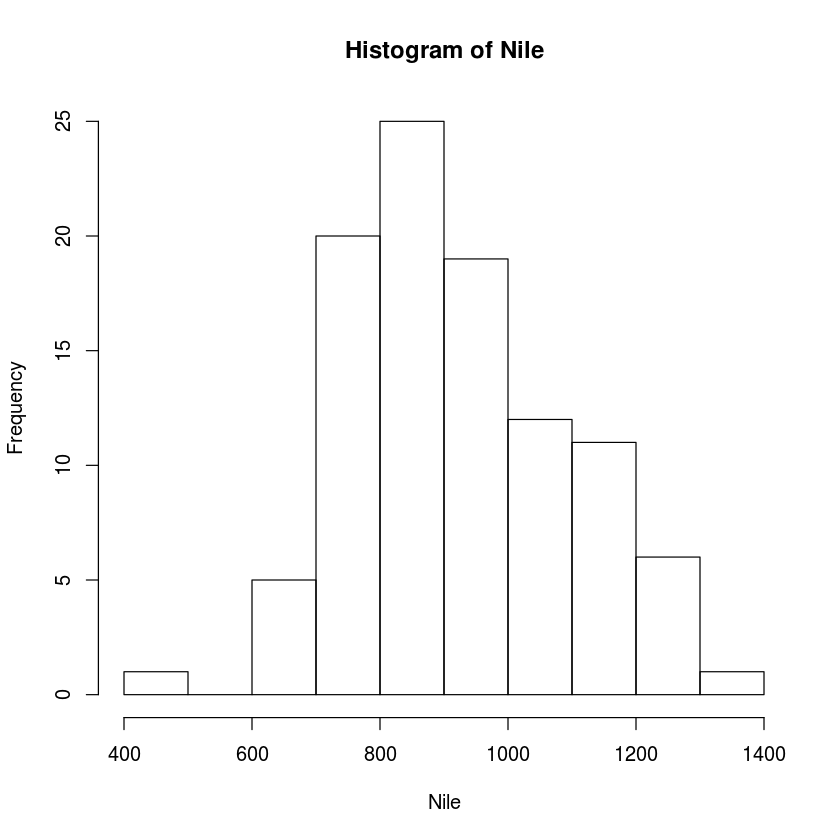

In [14]:
hist(Nile)

这是最简略的直方图, `hist()`还有若干参数可以设置, 从而控制直方图的外观, 通过`help(hist)`可查看.

### 函数入门

这还是第一次接触如何编写和使用R语言的函数.

编写一个函数`oddcount()`, 用来计算整数向量中的奇数个数.

In [15]:
oddcount <- function(x) {
    k <- 0
    for (n in x) {
        if (n %% 2 ==1) {k <- k+1} 
    }
    
    return(k)
}

In [16]:
oddcount(c(1, 3, 5))

[1] 3

In [17]:
oddcount(c(1,2,3))

[1] 2

好了, 函数定义完了, 运行正常. 

快速总结一下R中编写函数的要点:

- 定义函数关键字`function`
- 返回值用`return()`, 括号不能省略
- JS风格, 可以在语句后面加`;` 也可以不加.

还有一点, 取余运算符是`%%`, 这点不同于C语言.

#### 默认参数

这样写:

```R
g <- function(x, y=2, z=T) {...}
```

和Python一致, 不多说.

`g(12, z=FALSE)`中x的值是12, y的值默认为2, z的值为FALSE.

顺带一提: R语言中boolean变量的值分别为`TRUE`和`FALSE`, 允许缩写为`T`和`F`.

### R语言数据结构

#### 向量

向量类型是R语言的核心数据类型. 很难想象R语言代码一点不涉及向量.

向量的元素必须属于某种`模式`(mode), 或者用更加通俗的话来说, `数据类型`. 一个向量可以由三个字符串组成(字符模式), 或者由三个整数组成(整数模式), 但不可以由一个整数元素和两个字符串元素组成.

后面再详细介绍向量.

#### 标量

标量, 或者单个的数, 其实在R语言中不存在. 如前面提到的, 单个的数实际被视为一元向量. 

#### 字符串

反常识的来了.

字符串实际是字符模式(而不是数值模式)的单元素向量.

示例如下:

In [18]:
x <- c(1, 2, 4)

In [19]:
x

[1] 1 2 4

In [20]:
length(x)

[1] 3

In [21]:
mode(x)

[1] "numeric"

In [22]:
y <- 'abc'

In [23]:
length(y)

[1] 1

In [24]:
mode(y)

[1] "character"

length(y)的值竟然是1, 也就是说`'abc'`这个字符串被视为单元素, 而这个单元素又被视为一个单元素向量.

谈到字符串, 就要顺便谈一下字符串操作, 谈一下R的字符串操作函数.

- 连接字符串

In [25]:
u <- paste('abc', 'de', 'f')

In [26]:
u

[1] "abc de f"

- split字符串

In [27]:
v <- strsplit(u, ' ')

In [28]:
v

[[1]]
[1] "abc" "de"  "f"

#### 矩阵

R中的矩阵和数学中一样: 矩形的数值数组.

从技术层面来说, 矩阵也是向量, 不过矩阵还有两个附加的属性: 行数和列数. 下面是一些例子:

In [29]:
m <- rbind(c(1,4), c(2,2))

In [30]:
m

1,4
2,2


In [31]:
m %*% c(1,1)

5
4


首先, `rbind`是`row bind`的缩写, 意思是按行绑定. rbind()函数把两个向量结合成一个矩阵, 这两个向量是矩阵的行. (相应的还有cbind()函数把向量作为列组成矩阵.) 然后, 将该矩阵赋给变量m. 

然后计算m和向量(1, 1)的矩阵积, 这是线性代数中的矩阵乘法, 在R中的运算符是`%*%`

矩阵使用双下标索引元素, 只是下标从1开始:

In [32]:
m[1, 2]

[1] 4

In [33]:
m[2, 2]

[1] 2

R还可以很方便地提取子矩阵, 示例如下:

In [34]:
m[1, ] # row 1

[1] 1 4

In [35]:
m[, 2] # column 2

[1] 4 2

#### 列表

和向量类似, R中列表也是值的容器. 但是其内容中的各项可以属于不同的数据类型. 可以通过

In [36]:
x <- list(u=2, v="abc")

In [37]:
x

$u
[1] 2

$v
[1] "abc"

In [38]:
x$u

[1] 2

x$u指的是列表x中的组件u. x还包含另一个组件v.

列表的常见用法是将多个值打包, 然后从函数返回.

这位返回复杂的结果提供了方便.

前面提到了R绘制基础直方图的函数`hist`, 使用Nile数据集:

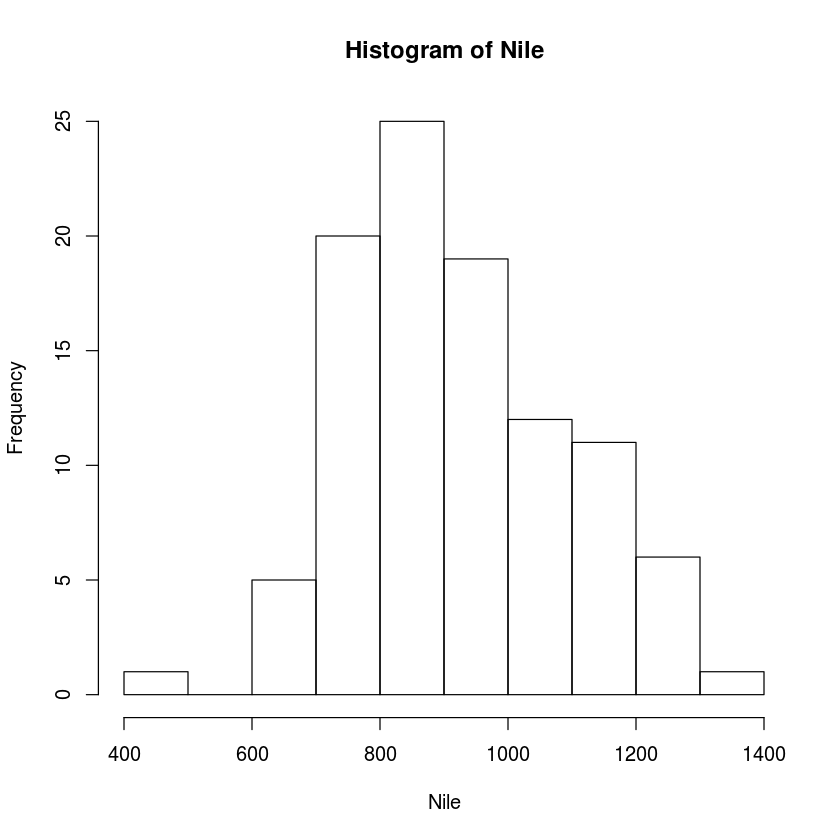

In [39]:
hist(Nile)

这条语句生成了一幅直方图, 不过hist()函数同样有返回值:

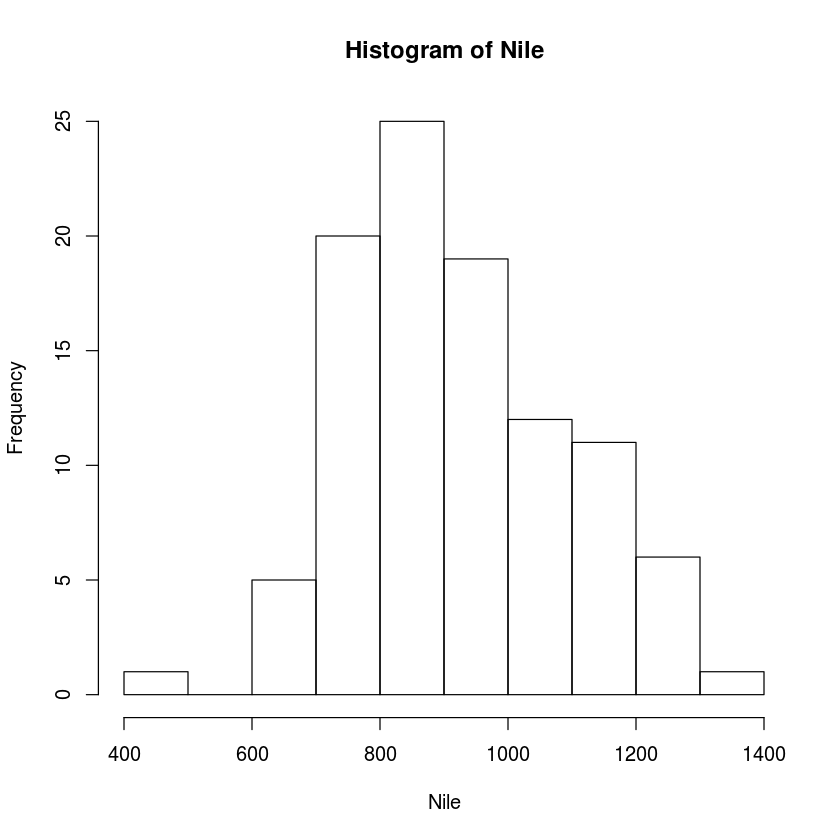

In [40]:
hn <- hist(Nile)

来看看hn里面都有什么:

In [41]:
print(hn)

$breaks
 [1]  400  500  600  700  800  900 1000 1100 1200 1300 1400

$counts
 [1]  1  0  5 20 25 19 12 11  6  1

$density
 [1] 0.0001 0.0000 0.0005 0.0020 0.0025 0.0019 0.0012 0.0011 0.0006 0.0001

$mids
 [1]  450  550  650  750  850  950 1050 1150 1250 1350

$xname
[1] "Nile"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


虽然看不太明白, 但是我们已经知道, 除了绘制直方图之外, hist()还会返回包含若干组件的列表.

在这里, 这些组件描述了直方图的特征. 例如, 组件breaks表明直方图的分组情况, 组件counts表明每个直条里观测值的个数.

R语言设计者把`hist()`返回的信息打包到一个R列表中. 这样就可以通过美元符号$来访问每一个组件.

打印hn的几种方式:

- 直接键入变量名

In [42]:
hn

$breaks
 [1]  400  500  600  700  800  900 1000 1100 1200 1300 1400

$counts
 [1]  1  0  5 20 25 19 12 11  6  1

$density
 [1] 0.0001 0.0000 0.0005 0.0020 0.0025 0.0019 0.0012 0.0011 0.0006 0.0001

$mids
 [1]  450  550  650  750  850  950 1050 1150 1250 1350

$xname
[1] "Nile"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

- 使用str()函数

In [43]:
str(hn)

List of 6
 $ breaks  : int [1:11] 400 500 600 700 800 900 1000 1100 1200 1300 ...
 $ counts  : int [1:10] 1 0 5 20 25 19 12 11 6 1
 $ density : num [1:10] 0.0001 0 0.0005 0.002 0.0025 0.0019 0.0012 0.0011 0.0006 0.0001
 $ mids    : num [1:10] 450 550 650 750 850 950 1050 1150 1250 1350
 $ xname   : chr "Nile"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


注意, 这里的`str`不是`string`, 而是`structure`. 这个函数可以显示任何R对象的内部结构, 而不限于列表.

#### 数据框

常见表格中经常有多种数据类型. 

例如在一个员工数据集里, 可能有字符串(员工姓名), 数值(工资)等.

当有多名员工的时候, 这样的表格看起来像是矩阵, 但是这并不符合R中的矩阵定义, 因为其中有多种数据类型.

所以数据框就是为此而准备的, 它可以存储多种数据类型的数据.

R中的数据框其实就是列表, 列表中每个组件是由前面提到的向量构成.

示例如下:

In [44]:
d <- data.frame(list(kids=c('Jack', 'Jill')), ages=c(12, 10))

In [45]:
d

kids,ages
Jack,12
Jill,10


In [46]:
d$ages

[1] 12 10

不过, 通常数据框是通过读取文件或数据库来创建的.

对了, 要怎么理解数据框呢, 其实理解成常见的表格就好了.

#### 类

R同样是一门面向对象的编程语言, Surprise!

同样, 对象是类的实例.

大多数R对象基于S3类. (名称来源与第三代S语言, 这是R的灵感来源)

`S3类的实例`仅仅是`列表`, 不过还附带一个属性名: 类名.

例如, 前面提到的直方图函数hist()的非图形输出就是一个列表, 而`break`和`count`都是它的组件, 它还有一个属性(`attribute`), 用来指定列表的类, 即`histogram类`.

In [47]:
print(hn)

$breaks
 [1]  400  500  600  700  800  900 1000 1100 1200 1300 1400

$counts
 [1]  1  0  5 20 25 19 12 11  6  1

$density
 [1] 0.0001 0.0000 0.0005 0.0020 0.0025 0.0019 0.0012 0.0011 0.0006 0.0001

$mids
 [1]  450  550  650  750  850  950 1050 1150 1250 1350

$xname
[1] "Nile"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


现在有一个疑问, 如果所有S3类的实例都是列表, 那为什么还需要类的概念?

答案是, 类需要用在泛型函数中. 泛型函数可以适用于不同类的实例.

一个常用的泛型函数是`summary()`. 如果使用统计函数, 如`hist()`, 但是不确定如果处理其输出结果, 就可以鸡蛋的调用summary()函数.

summary()函数实际上生成摘要的函数族, 其中每个函数处理摸某个特定的类, 只是表面看上去都是summary()处理的, 用户也不需要关系内部细节.

当在某个输出结果上调用`summary()`函数, R会为要处理的类寻找合适的摘要函数, 并使用列表的更友好的方式来展示.

因此, 对`hist()`的输出结果使用`summary()`函数会生成与之相适应的摘要.

In [48]:
summary(hn)

         Length Class  Mode     
breaks   11     -none- numeric  
counts   10     -none- numeric  
density  10     -none- numeric  
mids     10     -none- numeric  
xname     1     -none- character
equidist  1     -none- logical  

`plot`函数是另一个泛型函数, 可以对任一个R对象使用`plot()`函数, R会根据对象的类来寻找合适的画图函数.

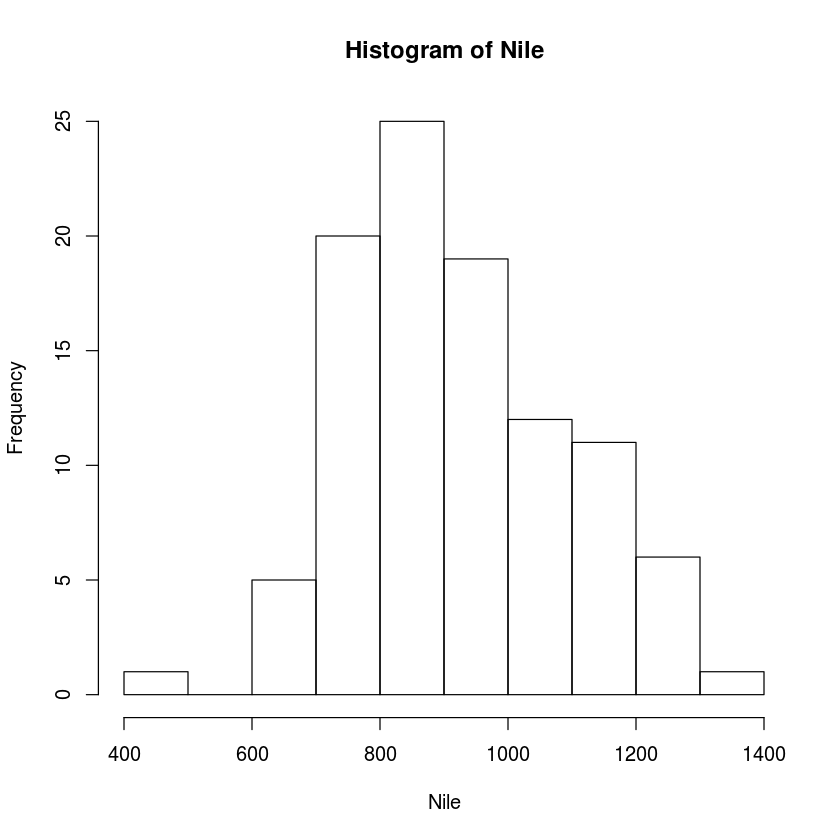

In [49]:
plot(hn)

其实, 为什么需要类这个概念依然没有说清楚, 可能作者觉得已经说清楚了吧. 感觉他的意思大概是如果要实现泛型函数, 就需要在类的定义过程中提供支持.

### 案例 考试成绩的回归分析

通过一个例子回顾一下前面的知识点.

`ExamsQuiz.txt`文件包含学生的期中考试成绩, 期末考试成绩, 平时测验成绩. 

现在用期中考试成绩和平时测验成绩来预测期末成绩.

先读入数据文件:

In [50]:
examsquiz <- read.table('./data/ExamsQuiz.txt', header=FALSE)

这个数据文件的第一行不是记录的变量名, 也就是说没有表头行, 所以函数调用中设定`header=FALSE`.

默认读取也是没有表头(可查read.table()帮助), 但是这样做会更明了.

In [51]:
class(examsquiz)

[1] "data.frame"

In [52]:
head(examsquiz)

V1,V2,V3
2.0,4.0,4
1.7,2.7,4
1.3,3.3,4
3.3,3.3,4
0.0,3.3,4
3.0,3.7,4


由于缺少数据表头, R自动将列名设置为V1 V2 V3. 行号出现在每行的最左边. 

后面我们会给每列设置一个名称.

我们用期中成绩(第一列)预测期末考试成绩(第二列):

In [53]:
lma <- lm(examsquiz[,2] ~ examsquiz[,1])

这里调用的`lm()`函数(lm是linear model的缩写), 让拟合下面的预测方程:

$期末考试成绩预测值 = \beta_0 + \beta_1 * 期中考试成绩$

拟合过程是用经典的最小二乘法完成.

lm()返回记过保存在lma变量中, 他是lm类的一个实例. 可以调用attributes()函数列出它的所有组件.

In [54]:
attributes(lma)

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

$\beta_i$的值保存在lma$coefficicents中. 在命令提示符下键入系数的变量名就可以显示系数.

获取列表的组件时, 组件名可缩写, 只要不引起混淆, 比如:

In [55]:
lma$coef

(Intercept) examsquiz[, 1] 
     3.0881813      0.1582661

当打印lma本身的时候, 是这样的:

In [56]:
lma


Call:
lm(formula = examsquiz[, 2] ~ examsquiz[, 1])

Coefficients:
   (Intercept)  examsquiz[, 1]  
        3.0882          0.1583  


为什么R只打印这些项, 而没有打印出lma的其他组件?

因为这里的`print()`函数是一个泛型函数. 作为泛型函数, print()实际把打印任务交给了另一个函数: `print.lm()`, 这个函数的功能是打印lm类的对象, 即上面函数展示的内容.

试试summary(), 它实际在后台调用了summary.lm(), 该函数返回特定回归模型的摘要:

In [57]:
summary(lma)


Call:
lm(formula = examsquiz[, 2] ~ examsquiz[, 1])

Residuals:
     Min       1Q   Median       3Q      Max 
-2.08818 -0.26298  0.05355  0.27875  0.91182 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.08818    0.19773  15.618 3.06e-16 ***
examsquiz[, 1]  0.15827    0.06625   2.389   0.0232 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5432 on 31 degrees of freedom
Multiple R-squared:  0.1555,	Adjusted R-squared:  0.1282 
F-statistic: 5.706 on 1 and 31 DF,  p-value: 0.02317


其他泛型函数也有针对这个类的定义. 查看lm()帮助文档了解更多.

要用期中考试成绩和平时测验成绩预测期末考试成绩, 可以使用符号`+`:

In [58]:
lmb <- lm(examsquiz[,2] ~ examsquiz[, 1] + examsquiz[, 3])

In [59]:
attributes(lmb)

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

In [60]:
summary(lmb)


Call:
lm(formula = examsquiz[, 2] ~ examsquiz[, 1] + examsquiz[, 3])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.62521 -0.14041  0.07577  0.33247  0.77577 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -4.76280    2.21783  -2.148  0.03995 * 
examsquiz[, 1]  0.14330    0.05667   2.529  0.01695 * 
examsquiz[, 3]  1.99676    0.56243   3.550  0.00129 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4633 on 30 degrees of freedom
Multiple R-squared:  0.4053,	Adjusted R-squared:  0.3657 
F-statistic: 10.22 on 2 and 30 DF,  p-value: 0.0004115


### 使用Tips

这一部分也许很有用.

- 设置调用edit()时启动文本编辑器

    option(edit='/usr/bin/vim')

    `option()`函数可以用来调整各种设置.


- 添加第三方包所在目录

    `.libPaths('/home/nm/R')`



- 获取当前工作目录

    `getwd()`


- 修改工作目录

    `setwd()`
    
- help函数

    以获取seq()函数帮助为例子:
        - `help(seq)`, 可简写为`?seq`
        - 获取特殊符号和保留字帮助: `?"<"`

- example函数

    example()函数会运行例子代码, 非常有用, 示例如下:

In [61]:
example(seq)


seq> seq(0, 1, length.out = 11)
 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

seq> seq(stats::rnorm(20)) # effectively 'along'
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

seq> seq(1, 9, by = 2)     # matches 'end'
[1] 1 3 5 7 9

seq> seq(1, 9, by = pi)    # stays below 'end'
[1] 1.000000 4.141593 7.283185

seq> seq(1, 6, by = 3)
[1] 1 4

seq> seq(1.575, 5.125, by = 0.05)
 [1] 1.575 1.625 1.675 1.725 1.775 1.825 1.875 1.925 1.975 2.025 2.075 2.125
[13] 2.175 2.225 2.275 2.325 2.375 2.425 2.475 2.525 2.575 2.625 2.675 2.725
[25] 2.775 2.825 2.875 2.925 2.975 3.025 3.075 3.125 3.175 3.225 3.275 3.325
[37] 3.375 3.425 3.475 3.525 3.575 3.625 3.675 3.725 3.775 3.825 3.875 3.925
[49] 3.975 4.025 4.075 4.125 4.175 4.225 4.275 4.325 4.375 4.425 4.475 4.525
[61] 4.575 4.625 4.675 4.725 4.775 4.825 4.875 4.925 4.975 5.025 5.075 5.125

seq> seq(17) # same as 1:17, or even better seq_len(17)
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17


通过观察第3个和第4个例子, 即可知道`seq`对边界情况的处理.

另外, 最有用的大概是展示`绘图函数`如何使用了:


plot> require(stats) # for lowess, rpois, rnorm

plot> plot(cars)

plot> lines(lowess(cars))

plot> plot(sin, -pi, 2*pi) # see ?plot.function


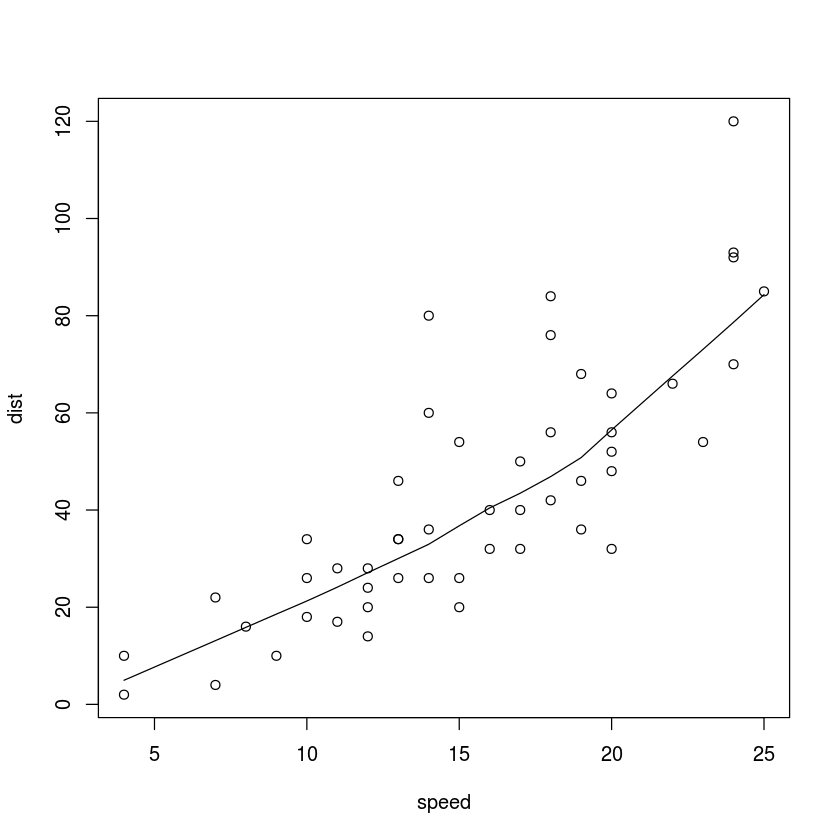


plot> ## Discrete Distribution Plot:
plot> plot(table(rpois(100, 5)), type = "h", col = "red", lwd = 10,
plot+      main = "rpois(100, lambda = 5)")


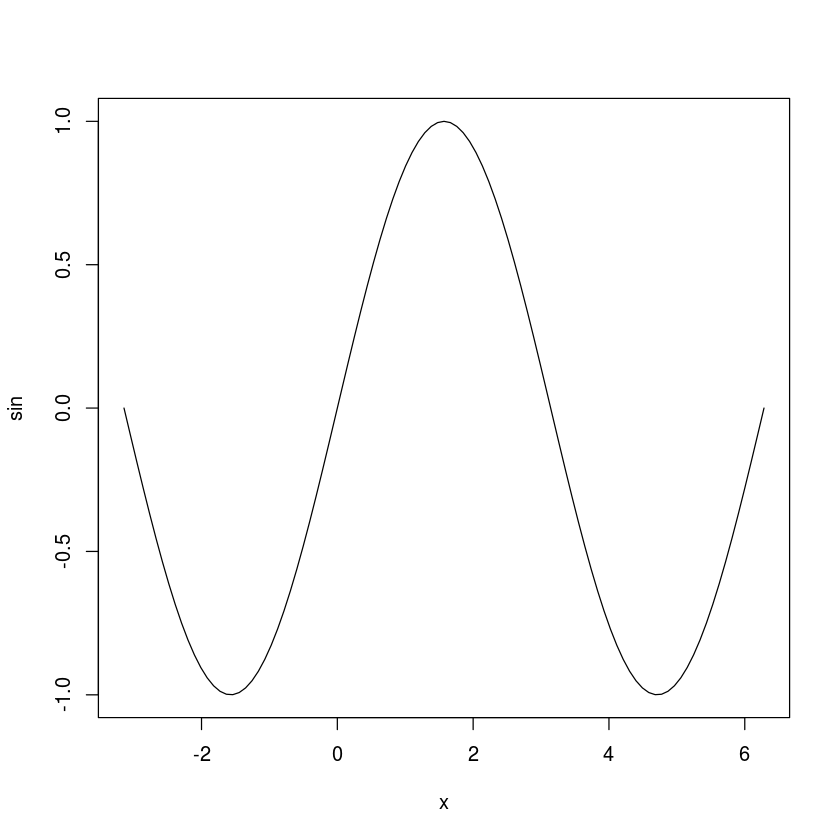


plot> ## Simple quantiles/ECDF, see ecdf() {library(stats)} for a better one:
plot> plot(x <- sort(rnorm(47)), type = "s", main = "plot(x, type = \"s\")")


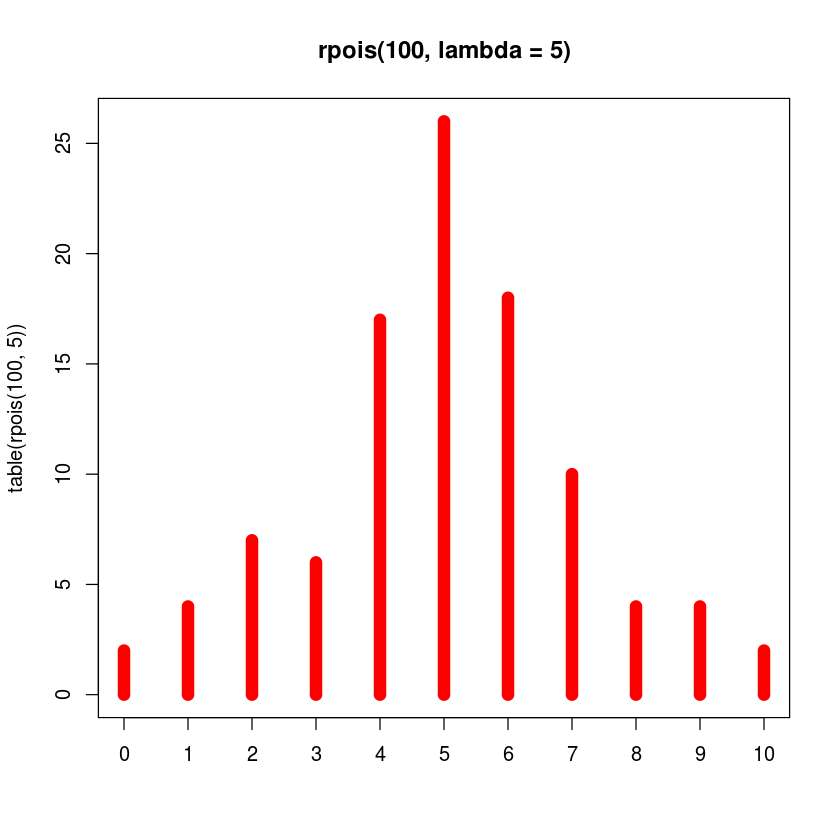


plot> points(x, cex = .5, col = "dark red")


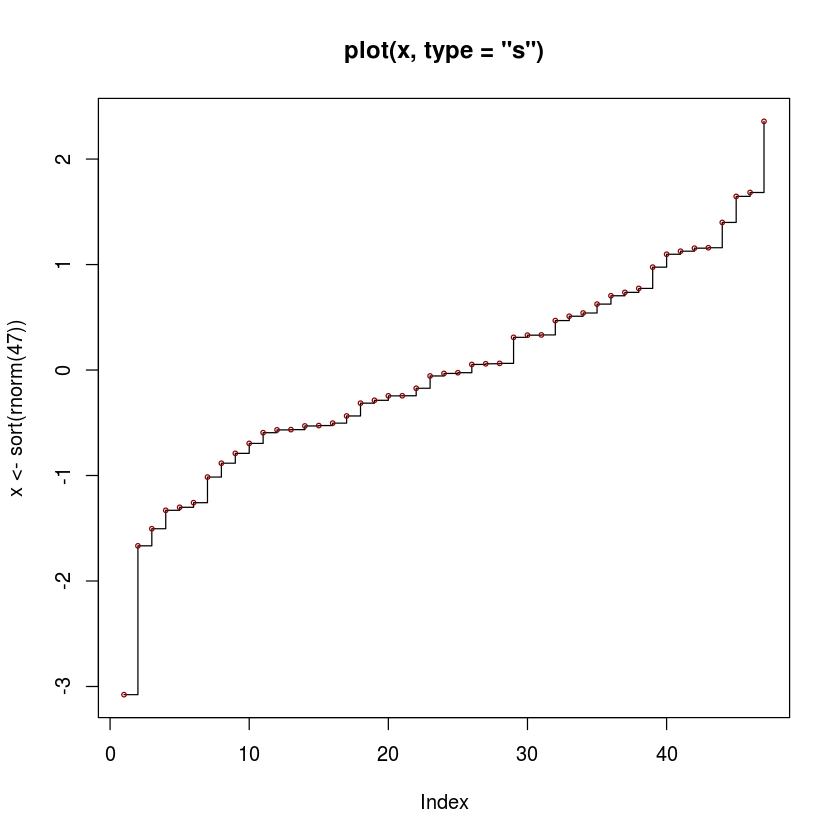

In [62]:
example(plot)


persp> require(grDevices) # for trans3d

persp> ## More examples in  demo(persp) !!
persp> ##                   -----------
persp> 
persp> # (1) The Obligatory Mathematical surface.
persp> #     Rotated sinc function.
persp> 
persp> x <- seq(-10, 10, length= 30)

persp> y <- x

persp> f <- function(x, y) { r <- sqrt(x^2+y^2); 10 * sin(r)/r }

persp> z <- outer(x, y, f)

persp> z[is.na(z)] <- 1

persp> op <- par(bg = "white")

persp> persp(x, y, z, theta = 30, phi = 30, expand = 0.5, col = "lightblue")

persp> persp(x, y, z, theta = 30, phi = 30, expand = 0.5, col = "lightblue",
persp+       ltheta = 120, shade = 0.75, ticktype = "detailed",
persp+       xlab = "X", ylab = "Y", zlab = "Sinc( r )"
persp+ ) -> res


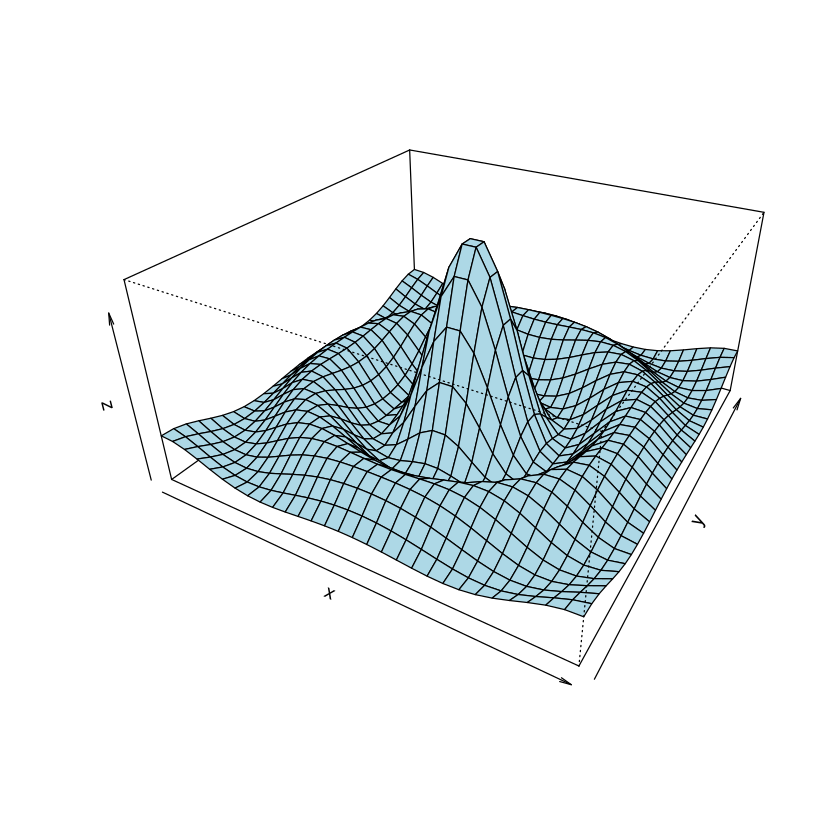


persp> round(res, 3)
      [,1]   [,2]   [,3]   [,4]
[1,] 0.087 -0.025  0.043 -0.043
[2,] 0.050  0.043 -0.075  0.075
[3,] 0.000  0.074  0.042 -0.042
[4,] 0.000 -0.273 -2.890  3.890

persp> # (2) Add to existing persp plot - using trans3d() :
persp> 
persp> xE <- c(-10,10); xy <- expand.grid(xE, xE)

persp> points(trans3d(xy[,1], xy[,2], 6, pmat = res), col = 2, pch = 16)

persp> lines (trans3d(x, y = 10, z = 6 + sin(x), pmat = res), col = 3)

persp> phi <- seq(0, 2*pi, len = 201)

persp> r1 <- 7.725 # radius of 2nd maximum

persp> xr <- r1 * cos(phi)

persp> yr <- r1 * sin(phi)

persp> lines(trans3d(xr,yr, f(xr,yr), res), col = "pink", lwd = 2)

persp> ## (no hidden lines)
persp> 
persp> # (3) Visualizing a simple DEM model
persp> 
persp> z <- 2 * volcano        # Exaggerate the relief

persp> x <- 10 * (1:nrow(z))   # 10 meter spacing (S to N)

persp> y <- 10 * (1:ncol(z))   # 10 meter spacing (E to W)

persp> ## Don't draw the grid lines :  border = NA
persp> par(bg = "slategray")



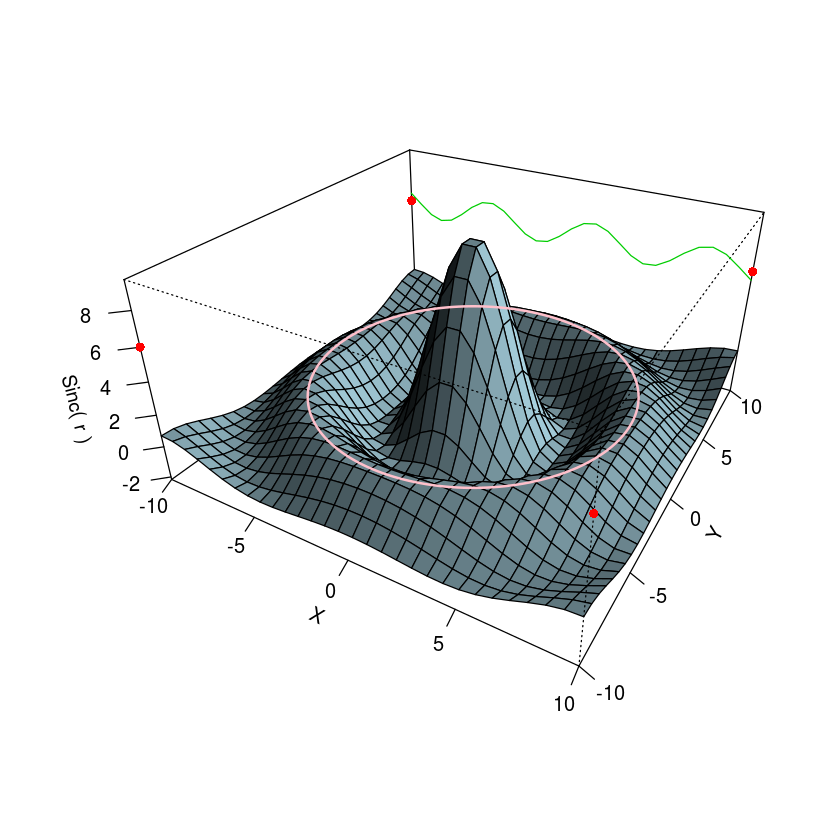


persp> # (4) Surface colours corresponding to z-values
persp> 
persp> par(bg = "white")

persp> x <- seq(-1.95, 1.95, length = 30)

persp> y <- seq(-1.95, 1.95, length = 35)

persp> z <- outer(x, y, function(a, b) a*b^2)

persp> nrz <- nrow(z)

persp> ncz <- ncol(z)

persp> # Create a function interpolating colors in the range of specified colors
persp> jet.colors <- colorRampPalette( c("blue", "green") )

persp> # Generate the desired number of colors from this palette
persp> nbcol <- 100

persp> color <- jet.colors(nbcol)

persp> # Compute the z-value at the facet centres
persp> zfacet <- z[-1, -1] + z[-1, -ncz] + z[-nrz, -1] + z[-nrz, -ncz]

persp> # Recode facet z-values into color indices
persp> facetcol <- cut(zfacet, nbcol)

persp> persp(x, y, z, col = color[facetcol], phi = 30, theta = -30)


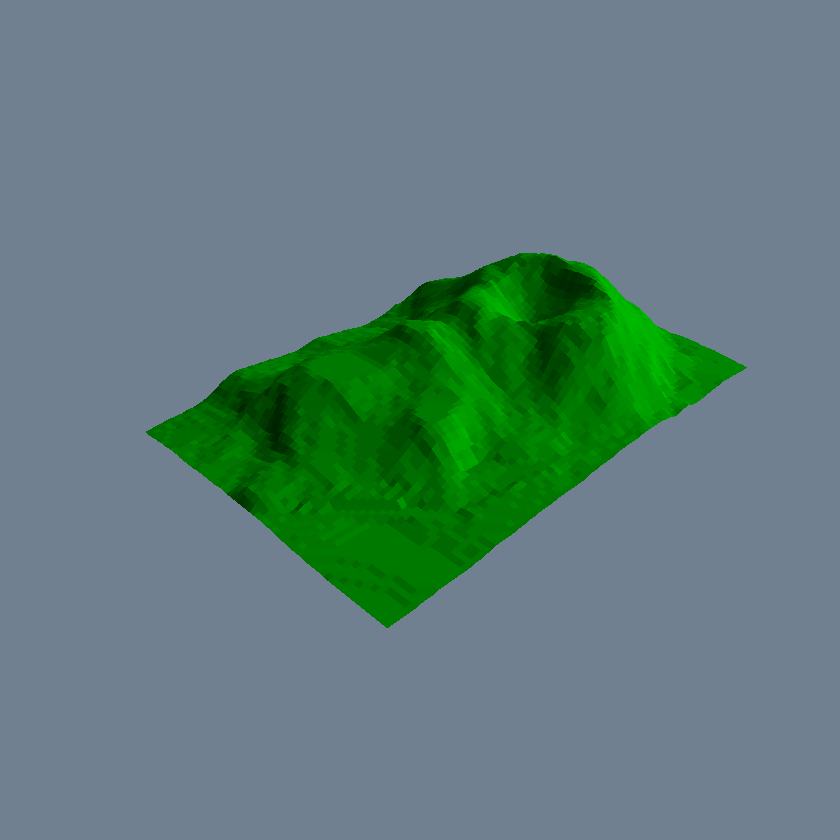


persp> par(op)


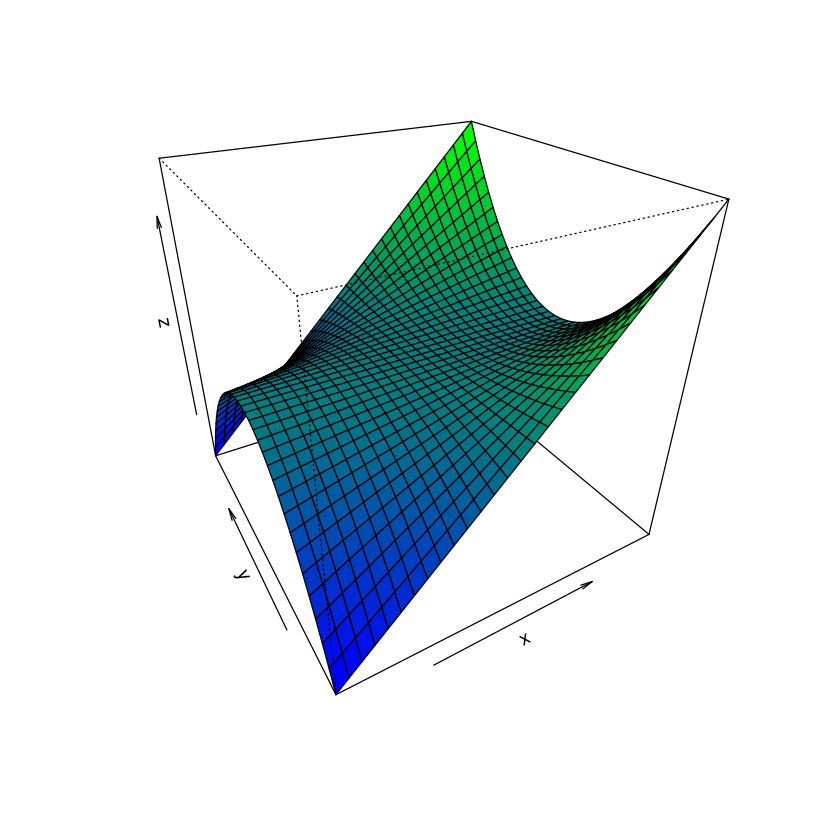

In [63]:
example(persp)

- help.search()
    - `help.search()`在R文档中进行全文搜索, 当不知道应该使用什么函数时, 可以使用该函数搜索关键字.
    - 该函数的快捷方式是: `??"keyword or purpose"`

- 获取整个包的信息
    
    比如获取`MASS`包的信息, 可以这么写: `help(package=MASS)`

- 谷歌搜索R脚本

    由于R的名称只是一个字母, 所以很难在Google上搜到相关信息, 不过可以通过一些技巧解决搜索问题:
    - 比如搜索`filetype:R permutations -rebol`, `-rebol`是排除关于`rebol`的页面, rebol是一种编程语言, 其源文件也使用`.r`后缀.
    - 借助CRAN关键字, 比如搜索`lm CRAN`.

## Chapter02 向量

前面说过, 向量是R语言最基本的数据类型, 本章详细介绍向量.

首先考察向量与R中其他数据类型之间的关系. 与C语言家族不同, R语言中, 单个数值(即标量)没有单独的数据类型, 它只不过是向量的一种特例. R语言中矩阵是向量的一种特例.


接下来, 重点关注以下话题:

- 循环补齐: 在一定情况下自动延长向量
- 筛选: 提取向量子集
- 向量化: 对向量的每一个元素应用函数

这些运算是R编程的核心.

我们知道， 在很多编程语言中， 向量与标量（即单个数值）不同， 比如考虑下面的C代码：

```C
int x;
int y[3];
```

这里, 是请求C编译器, 给一个名为x的整型变量分配内存, 并给一个名为y的三元素整型数组分配内存. 如果将x和y分别类比为R中的标量和向量, 那么x实际在R中不存在, 因为R中没有标量.

R中的数据类型不称类型(`type`), 而称模式(`mode`).

回顾第一章, 向量中所有元素的模式(数据类型)必须相同, 这些模式可以是:
- 整型
- 数值型(浮点数)
- 字符型(字符串)
- 逻辑型(布尔逻辑)
- 复数型
- ...

可以用`typeof()`查看变量类型.

另外不同于C/Python, R中向量索引从1开始.

#### 添加或者删除向量元素

R中向量是连续存储的, 不能插入或者删除元素.

把一个元素插入一个四元向量的中间, 这样操作:

In [64]:
x <- c(88, 5, 12, 13)

In [65]:
x <- c(x[1:3], 168, x[4])

In [66]:
x

[1]  88   5  12 168  13

#### 获取向量长度

In [67]:
x <- c(1, 2, 4)

In [68]:
length(x)

[1] 3

#### 作为向量的矩阵

矩阵实际是向量, 只不过有额外的属性. 比如, 矩阵有行数和列数. 我们在下一章详细讨论.

In [69]:
m <- rbind(
    c(1, 2),
    c(3, 4)
)

In [70]:
m

1,2
3,4


In [71]:
m + 10:13

11,14
14,17


为什么得到这样的结果?


答案是m这个矩阵实际是一个`按列存储`的4个元素的`向量`, 即(1, 3, 2, 4), 那么自然地有: `(1, 3, 2, 4) + (10, 11, 12, 13) = (11, 14, 14, 17)`

#### 变量声明

和Python一样, R使用变量前不需要声明.

但是如果引用向量中特定的元素, 就必须实现告知R.

例如, 如果希望y是一个2个元素组成的向量, 这样写不能达到目的:

In [72]:
y[1] <- 5
y[2] <- 12

这时必须先创建y:

In [73]:
y <- vector(length=2)
y[1] <- 5
y[2] <- 12

In [74]:
y

[1]  5 12

当然, 如果已知向量的全貌, 直接这样写:

In [75]:
y <- c(5, 12)

#### 循环补齐

在对两个向量使用运算符时, 如果要求这两个向量具有相同的长度, R会自动补齐(recycle): 即重复较短的向量, 知道它与较长向量长度匹配. 看例子:

In [76]:
c(1, 2, 4) + c(6, 0, 9, 20, 22)

Warning message in c(1, 2, 4) + c(6, 0, 9, 20, 22):
“longer object length is not a multiple of shorter object length”

[1]  7  2 13 21 24

得到的结果相当于执行:

In [77]:
c(1, 2, 4, 1, 2) + c(6, 0, 9, 20, 22)

[1]  7  2 13 21 24

下面是一个更巧妙的例子:

In [78]:
x <- rbind(
    c(1, 4),
    c(2, 5),
    c(3, 6)
)

In [79]:
x

1,4
2,5
3,6


In [80]:
x + c(1,2)

2,6
4,6
4,8


前面说了, 矩阵实际是按列存储的向量, 这样的结果就说得通了.

上面相加相当于:

x + c(1,2, 1,2, 1,2)

进一步等价于: 


$$
\begin{pmatrix}
{1}&{4}\\
{2}&{5}\\
{3}&{6}\\
\end{pmatrix} 
+
\begin{pmatrix}
{1}&{2}\\
{2}&{1}\\
{1}&{2}\\
\end{pmatrix} 
$$

求和结果不言自明.

### 常用向量计算

#### 加减乘除

In [81]:
2 + 3

[1] 5

In [82]:
"+"(2,3)

[1] 5

In [83]:
x <- c(1, 2, 4)

In [84]:
x + c(5, 0, -1)

[1] 6 2 3

In [85]:
x * c(5, 0, -1)

[1]  5  0 -4

In [86]:
x / c(5, 4, -1)

[1]  0.2  0.5 -4.0

In [87]:
x %% c(5, 4, -1)

[1] 1 2 0

注意, 加减乘除都是通过自动补齐来保证向量等长, 然后再`点对点`运算, 最后得到的结果也和运算向量等长.

#### 向量索引(取子集)

索引向量的格式是`向量1[向量2]`, 返回的结果是: 向量1中索引为向量2的那些元素. 看例子:

In [88]:
y <- c(1.2, 3.9, 0.4, 0.12)

In [89]:
y[c(1, 3)] # 取出y中第一个和第三个元素

[1] 1.2 0.4

In [90]:
y[2:3]

[1] 3.9 0.4

In [91]:
v <- 3:4

In [92]:
y[v]

[1] 0.40 0.12

索引元素可以重复:

In [93]:
x <- c(4, 2, 17, 5)

In [94]:
y <- x[c(1, 1, 3)]

In [95]:
y

[1]  4  4 17

负数下标代表把元素剔除, 这和Python中的含义大大不同:

In [96]:
z <- c(5, 12, 13)

In [97]:
z[-1] #剔除z中第一个元素, 剩下的元素作为子集

[1] 12 13

In [98]:
z[c(-1,-2)]

[1] 13

取得z中最后一个元素除外的所有函数:

In [99]:
z[1:length(z)-1]

[1]  5 12

或者利用负值索引的含义:

In [100]:
z[-length(z)]

[1]  5 12

#### 利用`:`运算符创建向量

In [101]:
5:8

[1] 5 6 7 8

In [102]:
5:1

[1] 5 4 3 2 1

这个很方便, 也不需要解释.

需要注意`:`的运算优先级高于`*/+-`, 示例如下:

In [103]:
i <- 2

In [104]:
1:i -1

[1] 0 1

`1:i -1`相当于`(1:i)-1`

通过`?Syntax`可以查到详细的运算符优先级, 如下:

```
The following unary and binary operators are defined. They are listed in precedence groups, from highest to lowest.

:: :::	access variables in a namespace
$ @	component / slot extraction
[ [[	indexing
^	exponentiation (right to left)
- +	unary minus and plus
:	sequence operator
%any%	special operators (including %% and %/%)
* /	multiply, divide
+ -	(binary) add, subtract
< > <= >= == !=	ordering and comparison
!	negation
& &&	and
| ||	or
~	as in formulae
-> ->>	rightwards assignment
<- <<-	assignment (right to left)
=	assignment (right to left)
?	help (unary and binary)
```

#### 使用`seq()`创建向量

`seq()`是`:`的增强版. 它用来生成等差序列.

`3:8`生成c(3, 4, 5, 6, 7, 8), 其元素间隔为1. 用seq()可以生成间隔非1的向量:

In [105]:
seq(from=12, to=30, by=3)

[1] 12 15 18 21 24 27 30

In [106]:
seq(from=12, to=30, by=0.5)

[1] 12.0 12.5 13.0 13.5 14.0 14.5 15.0 15.5 16.0 16.5 17.0 17.5 18.0 18.5 19.0
[16] 19.5 20.0 20.5 21.0 21.5 22.0 22.5 23.0 23.5 24.0 24.5 25.0 25.5 26.0 26.5
[31] 27.0 27.5 28.0 28.5 29.0 29.5 30.0

#### `rep()`创建重复元素的向量

格式是rep(ele, times), 示例如下:

In [107]:
x <- rep(8, 4)

In [108]:
x

[1] 8 8 8 8

In [109]:
rep(c(5, 12, 13), 3)

[1]  5 12 13  5 12 13  5 12 13

In [110]:
rep(1:3, 2)

[1] 1 2 3 1 2 3

rep(x, args)还有一个参数each, 与times参数不同的是, 它指定x中每个元素重复的次数:

In [111]:
rep(c(5, 12, 13), each=2)

[1]  5  5 12 12 13 13

#### 使用all()和any()

- all(): 逻辑`与`运算
- any(): 逻辑`或`运算

> 插一句: 逻辑运算是`与或`; 集合运算是`交并`

In [112]:
x <- 1:10

In [113]:
any(x>8)

[1] TRUE

In [114]:
any(x>88)

[1] FALSE

In [115]:
all(x>88)

[1] FALSE

In [116]:
all(x>0)

[1] TRUE

例如, 计算`x>8`, 得到:

In [117]:
x > 8

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE

其中有TRUE, 所以any()返回TRUE.

#### 案例1: 寻找连续出现1的游程

> 在一个有0和1组成的序列中, 一个由连续0或1构成的串称为一个游程(run)

使用fundruns()找到游程开始的索引:

In [118]:
findruns <- function(x, k) {
    n <- length(x)
    runs <- NULL
    for (i in 1:(n-k+1)) {
        if (all(x[i:(i+k-1)] == 1))  runs <- c(runs, i)
    }
    return(runs)
}

In [119]:
y <- c(1,0,0,1,1,1,0,1,1)

In [120]:
findruns(y, 2)

[1] 4 5 8

长度为2的游程分别始于4, 5, 8索引的位置, 所以`findruns()`返回(4,5,8)

In [121]:
findruns(y, 3)

[1] 4

In [122]:
findruns(y, 2)

[1] 4 5 8

In [123]:
findruns(y, 6)

NULL

回顾`findruns()`函数, 其性能还可以优化.

In [124]:
findruns1 <- function(x, k) {
    n <- length(x)
    runs <- vector(length=n)
    count <- 0
    for (i in 1:(n-k+1)) {
        if (all(x[i:(i+k-1)] == 1)) {
            count = count + 1
            runs[count] <- i
    }
   }
    
        
    if (count>0) {
        runs <- runs[1:count]
    } else {
        runs <- NULL
    }
        
     return(runs)    
    
}

In [125]:
findruns1(y, 2)

[1] 4 5 8

*改进之处:*
- 给`runs`提前分配内存(按要检查的向量长度分配), 避免每次重新分配内存
- 检查没有符合要求游程的情况

#### 案例2: 预测离散值时间序列

观察到取值为0或1的数据, 每个时刻只有1个值.

为了了解具体应用, 假设这是每天的天气数据: 1代表有雨, 0代表无雨. 我们希望预测明天是否会下雨. 具体而言, 对于某个k值, 我们会根据最近k天的天气记录来预测明天的天气.

我们使用`过半数规则(majority rule)`: 如果在最近k期里1的数量大于等于k/2, 那么预测下一个值为1, 否则预测下一个值为0.

但是, 应该如何选择k? 显然, 如果选择的值太小, 则用于预测的样本量太小, 可如果k过大, 就导致我们使用过于早期的数据, 而这些数据缺少预测价值.

一个解决方案是针对一致的数据(即训练集), 变换不同的k值, 看看预测效果如何.

在天气的例子中, 假设我们有500天的数据, 我们先假设一个k值, 然户基于k天前的数据来预测每天的数据, 然后将预测值与已知值进行对比. 对于k=1, k=2, k=4, 我们分别做预测. 下面是相应的R代码:

In [2]:
preda <- function(x, k) {
    n <- length(x)
    k2 <- k/2
    pred <- vector(length=n-k)
    
    # 这里是预测过程
    # i可理解为第i个预测的值
    # x长度和k确定的情况下, 预测值的个数也是确定的, 为n-k个.
    for (i in 1:(n-k)) {
        if (sum(x[i:(i+(k-1))]) >= k2) {
            pred[i] <- 1
        } else {
            pred[i] <- 0
        }
    }
    
    # pred-x[(k+1):n]是求出预测值和实际值的差
    return(mean(abs(pred-x[(k+1):n])))
}

上述`for`循环是用来计算预测值的, 第一个预测的值是原时间序列的第k+1位(前面至少有k位才有第一次预测), 预测结果存在pred\[1\]中.

这样pred就一个存放了所有预测值的向量, 相应的`x[(k+1):n]`就是所有预测值对应的实际值.

`pred-x[(k+1):n]`就是`预测值`和`实际值`的差值, `pred`和`x[(k+1):n]`的结果均由`0` `1`组成, 二者相减的结果可能为`0` `1` `-1`, 代表了每个预测值和实际值的偏差.

`mean(abs(pred-x[(k+1):n]))`则对些偏差先取绝对值, 再取平均值, 以取平均值后的结果来衡量预测效果的好坏, 显现该值越小, 平均偏差越小, 预测的效果越好.

来实测一下吧:

In [5]:
x <- c(1,0,0,1,0,1,1,1,0,0,1,0,0,1)
preda(x, k=3)

[1] 0.5454545

哈哈, 改变上面的k值就可以看到返回不同的结果了, 经过试验: k=3的时候, 返回结果最小.

有点意思.

根据TARP一书, 这个`preda()`还可以改进, 进一步用到`cumsum()`累加函数再改进, 但是算法本质没有变, 这里略过不谈.

#### 向量化运算符

提高R代码运行速度的有效办法是向量化(vectorize), 这意味这作用在向量上的函数, 实际是作用在向量的每个元素上.